In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import random
from tqdm import tqdm
warnings.filterwarnings('ignore')
tqdm.pandas()

In [1]:
import tensorflow as tf
x = tf.random.uniform(shape=(32, 25, 1))
x

2022-08-05 02:20:51.500001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 02:20:51.589770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 02:20:51.589929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 02:20:51.591516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

<tf.Tensor: shape=(32, 25, 1), dtype=float32, numpy=
array([[[0.46448326],
        [0.8183948 ],
        [0.64258933],
        [0.7996682 ],
        [0.1611352 ],
        [0.4384774 ],
        [0.8168614 ],
        [0.6294068 ],
        [0.84574676],
        [0.7325758 ],
        [0.31973612],
        [0.28241706],
        [0.39791393],
        [0.9430572 ],
        [0.56113124],
        [0.9238653 ],
        [0.56575775],
        [0.6032741 ],
        [0.04451668],
        [0.38127673],
        [0.478009  ],
        [0.2507826 ],
        [0.5116527 ],
        [0.9568033 ],
        [0.09345508]],

       [[0.00759089],
        [0.1137991 ],
        [0.423025  ],
        [0.8361571 ],
        [0.3149401 ],
        [0.24300861],
        [0.41202402],
        [0.09735036],
        [0.13264465],
        [0.9777086 ],
        [0.35288537],
        [0.17996562],
        [0.27530968],
        [0.40913618],
        [0.613925  ],
        [0.612244  ],
        [0.76494837],
        [0.41450822],

In [18]:
import matplotlib.font_manager as fm

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'Nanum'

In [19]:
df_01 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df_02 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')
df_03 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv')
df_04 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv')
df_05 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv')
df_06 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')

In [20]:
df_03.drop(columns=['rct_no', 'vst_dt'], axis=1, inplace=True)

In [21]:
df_03['buy_am'].describe()

count    2.483040e+05
mean     2.013066e+04
std      2.430121e+05
min      1.000000e+00
25%      5.000000e+03
50%      9.000000e+03
75%      1.580000e+04
max      7.009200e+07
Name: buy_am, dtype: float64

In [23]:
def categoricalBuy(data):
    res = 0
    
    if data < 5000:
        res = 0
    elif data >= 5000 and data < 9000:
        res = 1
    elif data >= 9000 and data < 15800:
        res = 2
    else:
        res = 3
        
    return res

In [12]:
df_03['buy_am'] = df_03.progress_apply(lambda x : categoricalBuy(x['buy_am']), axis=1)

100%|███████████████████████████████| 248304/248304 [00:01<00:00, 152540.00it/s]


In [22]:
df_02.head(3)
df_02.drop(['rct_no', 'pd_c', 'buy_ct'], axis=1, inplace=True)
df_02

,cust,chnl_dv,cop_c,br_c,de_dt,de_hr,buy_am
0,M430112881,1,A01,A010039,20210101,10,15000.0
1,M646853852,1,A01,A010025,20210101,10,79700.0
2,M430112881,1,A01,A010039,20210101,10,19000.0
3,M430112881,1,A01,A010039,20210101,10,19000.0
4,M430112881,1,A01,A010039,20210101,10,19000.0
...,...,...,...,...,...,...,...
4381738,M533286446,2,A06,NaN,20211231,23,50000.0
4381739,M533286446,2,A06,NaN,20211231,23,50000.0
4381740,M533286446,2,A06,NaN,20211231,23,50000.0
4381741,M533286446,2,A06,NaN,20211231,23,50000.0


In [24]:
df_concat_02_03 = pd.concat([df_02, df_03])
df_concat_02_03

,cust,chnl_dv,cop_c,br_c,de_dt,de_hr,buy_am
0,M430112881,1,A01,A010039,20210101,10,15000.0
1,M646853852,1,A01,A010025,20210101,10,79700.0
2,M430112881,1,A01,A010039,20210101,10,19000.0
3,M430112881,1,A01,A010039,20210101,10,19000.0
4,M430112881,1,A01,A010039,20210101,10,19000.0
...,...,...,...,...,...,...,...
248299,M058650684,1,C02,C020002,20211116,14,2000.0
248300,M058650684,1,C02,C020002,20211116,19,26900.0
248301,M014154595,2,C01,C010087,20211212,9,2000.0
248302,M510878172,2,C01,C010007,20211127,19,6000.0


In [25]:
import preprocessing as pre

df = pre.parallel_dataframe(df_concat_02_03, pre.copMakeRatings, 6)

  0%|                                   | 191/771674 [00:09<10:48:25, 19.83it/s]

KeyboardInterrupt: 

  2%|▋                                 | 16556/771674 [12:07<8:37:41, 24.31it/s]

In [53]:
df['ratings'] = np.abs(df['ratings'])
df['ratings'].unique()

array([ 7.7,  7.8,  7.1,  8. ,  1.9,  6.8,  2.3,  6.6,  6.7,  7.4,  7. ,
        6.5,  7.2,  1.8,  2.2,  6.9,  2.1,  7.5,  9.3,  9.4,  9.5, 10. ,
        9.9,  9.7,  9.8, 10.1,  9.6,  0. ,  5.4,  6. ,  6.3,  5.7,  6.2,
        9.1,  1.4,  7.6,  8.3,  9.2,  9. ,  1.3,  3.3,  3.8,  5.5,  5.6,
        5.9,  1.1,  1.2,  3.5,  8.6,  0.2,  8.8,  6.1,  3.4,  3. ,  7.3,
        2.6,  2.4,  2.5,  8.1,  7.9,  1.6,  6.4,  3.1,  1.5,  2.9,  5.3,
        5.8,  4.3,  4.6,  0.9,  2. ,  4.4,  2.8,  4.2,  0.8,  5. ,  4.8,
        1. ,  8.4,  5.2,  3.2,  4. ,  4.1,  3.7,  3.6,  4.9,  4.5,  4.7,
        8.2,  0.7,  0.1,  5.1,  1.7,  0.6,  8.7,  8.5,  3.9,  2.7,  0.5,
        0.4,  0.3,  8.9])

In [39]:
df.to_csv('../dataset/cop_c_ratings.csv')

In [10]:
df_02 = pd.merge(df_02, df_04, on='pd_c')
df_02

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M506355556,A01000107137,1,A01,A010032,PD0290,20210101,15,199000.0,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M696533418,E06045892016,2,A06,NaN,PD0520,20211115,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381739,M696533418,E06045892016,2,A06,NaN,PD0520,20211115,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381740,M111856694,E06045887405,2,A06,NaN,PD0520,20211118,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381741,M001808316,E06045891296,2,A06,NaN,PD0520,20211118,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스


In [9]:
import preprocessing as pre

In [11]:
df_02_ratings = pre.parallel_dataframe(df_02, pre.make_ratings, 6)

100%|████████████████████████████████| 730290/730290 [11:23:13<00:00, 17.81it/s]


In [12]:
df_02_ratings.to_csv('../dataset/df_02_ratings.csv')

### ------------------------------------------------------------------------------------

In [4]:
df_cop = pd.read_csv('../dataset/cop_c_ratings.csv')
df_cop.drop('Unnamed: 0', axis=1, inplace=True)
df_cop

,cust,cop_c,br_c,chnl_dv,de_dt,de_hr,buy_am,ratings
0,M839993508,B01,B010012,1,20211026,12,3,7.8
1,M839993508,B01,B010012,1,20211106,10,3,7.9
2,M839993508,B01,B010012,1,20210211,12,3,7.9
3,M839993508,B01,B010012,1,20210920,10,3,7.8
4,M839993508,D01,D010614,1,20211010,9,1,2.0
...,...,...,...,...,...,...,...,...
248299,M058650684,C02,C020002,1,20211116,14,1,10.0
248300,M058650684,C02,C020002,1,20211116,19,3,10.0
248301,M014154595,C01,C010087,2,20211212,9,1,9.2
248302,M510878172,C01,C010007,2,20211127,19,1,9.7


In [5]:
df_product = pd.read_csv('../dataset/df_02_ratings.csv')
# df_product['buy_am'] = df_product.progress_apply(lambda x : categoricalBuy(x['buy_am']), axis=1)

In [24]:
df_product['buy_am'] = df_product.progress_apply(lambda x : categoricalBuy(x['buy_am']), axis=1)
df_product

100%|█████████████████████████████| 4368454/4368454 [00:29<00:00, 148652.09it/s]


,Unnamed: 0,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,ratings
0,0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,2,1,남성티셔츠,남성의류,남성의류상의,4.62
1,1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,3,1,남성티셔츠,남성의류,남성의류상의,4.62
2,2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,3,1,남성티셔츠,남성의류,남성의류상의,4.62
3,3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,3,1,남성티셔츠,남성의류,남성의류상의,4.62
4,4,M506355556,A01000107137,1,A01,A010032,PD0290,20210101,15,3,1,남성티셔츠,남성의류,남성의류상의,9.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,4381738,M696533418,E06045892016,2,A06,empty,PD0520,20211115,0,2,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스,0.45
4381739,4381739,M696533418,E06045892016,2,A06,empty,PD0520,20211115,0,2,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스,0.45
4381740,4381740,M111856694,E06045887405,2,A06,empty,PD0520,20211118,0,0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스,9.99
4381741,4381741,M001808316,E06045891296,2,A06,empty,PD0520,20211118,0,0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스,0.00


In [25]:
# df_product.drop('Unnamed: 0', axis=1, inplace=True)
df_product['br_c'].fillna('empty', inplace=True)

In [44]:
df_02['de_dt'] = df_02['de_dt'].astype('str')
df_02['de_dt'] = pd.to_datetime(df_02['de_dt'])
df_02

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,2021-01-01,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1


In [26]:
df_cop['de_dt'] = df_cop['de_dt'].astype('int64')
df_cop['de_dt'] = df_cop['de_dt'].astype('str')
df_cop.dropna(axis=0, inplace=True)

df_product['de_dt'] = df_product['de_dt'].astype('int64')
df_product['de_dt'] = df_product['de_dt'].astype('str')
df_product.dropna(axis=0, inplace=True)

In [39]:
df_cop['de_dt'] = pd.to_datetime(df_cop['de_dt'])
df_cop

,cust,cop_c,br_c,chnl_dv,de_dt,de_hr,buy_am,ratings
0,M839993508,B01,B010012,1,2021-10-26,12,3,7.8
1,M839993508,B01,B010012,1,2021-11-06,10,3,7.9
2,M839993508,B01,B010012,1,2021-02-11,12,3,7.9
3,M839993508,B01,B010012,1,2021-09-20,10,3,7.8
4,M839993508,D01,D010614,1,2021-10-10,9,1,2.0
...,...,...,...,...,...,...,...,...
248299,M058650684,C02,C020002,1,2021-11-16,14,1,10.0
248300,M058650684,C02,C020002,1,2021-11-16,19,3,10.0
248301,M014154595,C01,C010087,2,2021-12-12,9,1,9.2
248302,M510878172,C01,C010007,2,2021-11-27,19,1,9.7


In [27]:
df_product_cop = df_product[['cust', 'cop_c', 'br_c', 'chnl_dv','de_hr', 'de_dt', 'buy_am', 'ratings']]
df_product_cop

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings
0,M430112881,A01,A010039,1,10,20210101,2,4.62
1,M430112881,A01,A010039,1,10,20210101,3,4.62
2,M430112881,A01,A010039,1,10,20210101,3,4.62
3,M430112881,A01,A010039,1,10,20210101,3,4.62
4,M506355556,A01,A010032,1,15,20210101,3,9.45
...,...,...,...,...,...,...,...,...
4381738,M696533418,A06,empty,2,0,20211115,2,0.45
4381739,M696533418,A06,empty,2,0,20211115,2,0.45
4381740,M111856694,A06,empty,2,0,20211118,0,9.99
4381741,M001808316,A06,empty,2,0,20211118,0,0.00


In [28]:
weather_df = pd.read_csv('../dataset/weather.csv', encoding='euc-kr', skiprows=6)
weather_df['날짜'] = weather_df['날짜'].astype('str')
weather_df['날짜'] = weather_df['날짜'].str.replace(pat=r'-',repl=r'',regex=True)
weather_df['날짜'].astype('int64')

weather_df = weather_df.rename(columns={'날짜' : 'de_dt', '평균기온(℃)': '평균기온'})
weather_df.drop(columns=['지점', '최저기온(℃)', '최고기온(℃)'], axis=1, inplace=True)
weather_df

,de_dt,평균기온
0,20210101,-3.4
1,20210102,-2.8
2,20210103,-3.3
3,20210104,-2.0
4,20210105,-2.2
...,...,...
360,20211227,-4.6
361,20211228,0.0
362,20211229,2.5
363,20211230,-0.7


### start

In [29]:
df_concat_cop_product = pd.concat([df_product_cop, df_cop])
df_concat_cop_product

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings
0,M430112881,A01,A010039,1,10,20210101,2,4.62
1,M430112881,A01,A010039,1,10,20210101,3,4.62
2,M430112881,A01,A010039,1,10,20210101,3,4.62
3,M430112881,A01,A010039,1,10,20210101,3,4.62
4,M506355556,A01,A010032,1,15,20210101,3,9.45
...,...,...,...,...,...,...,...,...
248299,M058650684,C02,C020002,1,14,20211116,1,10.00
248300,M058650684,C02,C020002,1,19,20211116,3,10.00
248301,M014154595,C01,C010087,2,9,20211212,1,9.20
248302,M510878172,C01,C010007,2,19,20211127,1,9.70


In [30]:
df_cop_weather = pd.merge(df_concat_cop_product, weather_df, on='de_dt')
df_cop_weather.isna().sum()

cust       0
cop_c      0
br_c       0
chnl_dv    0
de_hr      0
de_dt      0
buy_am     0
ratings    0
평균기온       0
dtype: int64

In [31]:
df_cop_weather.rename(columns= {'평균기온' : 'aver_temp'}, inplace=True)

In [32]:
df_cop_weather

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings,aver_temp
0,M430112881,A01,A010039,1,10,20210101,2,4.62,-3.4
1,M430112881,A01,A010039,1,10,20210101,3,4.62,-3.4
2,M430112881,A01,A010039,1,10,20210101,3,4.62,-3.4
3,M430112881,A01,A010039,1,10,20210101,3,4.62,-3.4
4,M506355556,A01,A010032,1,15,20210101,3,9.45,-3.4
...,...,...,...,...,...,...,...,...,...
4616641,M603445400,C01,C010087,2,19,20211118,3,9.20,9.8
4616642,M914963204,D01,D011330,1,14,20211118,1,7.20,9.8
4616643,M914963204,D01,D011308,1,16,20211118,1,6.30,9.8
4616644,M343659173,C01,C010043,1,21,20211118,1,9.90,9.8


In [33]:
df_cop_weather.to_csv('../dataset/df_cop_weather.csv')

In [48]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

columns = ['cust', 'cop_c']

for i in columns:
    globals()[f'encoder_{i}'] = LabelEncoder()
    df_cop_weather[i] = globals()[f'encoder_{i}'].fit_transform(df_cop_weather[i]) 

In [53]:
from sklearn.preprocessing import StandardScaler
import numpy as np

columns = ['de_hr', 'aver_temp']

scaler = StandardScaler()
res = scaler.fit_transform(df_cop_weather[columns])
res

array([[-1.51580599, -1.76790198],
       [-1.51580599, -1.76790198],
       [-1.51580599, -1.76790198],
       ...,
       [ 0.09128553, -0.36898993],
       [ 1.43052846, -0.36898993],
       [-0.17656306, -0.36898993]])

In [19]:
df_cop_weather.head(3)

,cust,cop_c,br_c,chnl_dv,de_hr,de_dt,buy_am,ratings,aver_temp
0,12828,0,A010039,1,10,20210101,2,4.62,-3.4
1,12828,0,A010039,1,10,20210101,3,4.62,-3.4
2,12828,0,A010039,1,10,20210101,3,4.62,-3.4


### inverse

In [20]:
globals()['encoder_cop_c'].inverse_transform([0])

array(['A01'], dtype=object)

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_cop_weather, test_size=0.2, random_state=52)
print(train.shape, test.shape)

(3693316, 9) (923330, 9)


In [22]:
number_of_unique_user = len(df_cop_weather['cust'].unique())
number_of_unique_buy = len(df_cop_weather['buy_am'].unique())
number_of_unique_weather = len(df_cop_weather['aver_temp'].unique())
number_of_unique_hour = len(df_cop_weather['de_hr'].unique())
number_of_uniuqe_cop = len(df_cop_weather['cop_c'].unique())
print(number_of_unique_user, number_of_unique_buy, number_of_unique_weather, number_of_unique_hour, number_of_uniuqe_cop)

29756 4 211 24 12


In [23]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model

In [133]:
# buy_input = Input(shape=(1,), name='buy_input_layer')
user_input = Input(shape=(1,), name='user_input_layer')
# weather_input = Input(shape=(1,), name='weather_input_layer')
# hour_input = Input(shape=(1,), name='hour_input_layer')
cop_input = Input(shape=(1,), name='cop_input_layer')

# buy_embedding_layer = Embedding(number_of_unique_buy + 1, 10, name='buy_embedding_layer')
user_embedding_layer = Embedding(number_of_unique_user + 1, 8, name='user_embedding_layer')
# weather_embedding_layer = Embedding(number_of_unique_weather + 1, 500, name='weather_embedding_layer')
# hour_embedding_layer = Embedding(number_of_unique_hour + 1, 500, name='hour_embedding_layer')
cop_embedding_layer = Embedding(number_of_uniuqe_cop + 1, 8, name='cop_embedding_layer')

# product_vector_layer = Flatten(name='buy_vector_layer')
user_vector_layer = Flatten(name='user_vector_layer')
# weather_vector_layer = Flatten(name='weather_vector_layer')
# hour_vector_layer = Flatten(name='hour_vector_layer')
cop_vector_layer = Flatten(name='cop_vector_layer')

concate_layer = Concatenate()

# dense_layer1 = Dense(512, activation='relu')
dense_layer2 = Dense(128, activation='relu')
dense_layer3 = Dense(32, activation='relu')
dense_layer4 = Dense(16, activation='relu')

cop_result_layer = Dense(1, name='rating_result')

In [134]:
# buy_embedding = buy_embedding_layer(buy_input)
user_embedding = user_embedding_layer(user_input)
# weather_embedding = weather_embedding_layer(weather_input)
# hour_embedding = hour_embedding_layer(hour_input)
cop_embedding = cop_embedding_layer(cop_input)

# buy_vector = product_vector_layer(buy_embedding)
user_vector = user_vector_layer(user_embedding)
# weather_vector = weather_vector_layer(weather_input)
# hour_vector = hour_vector_layer(hour_input)
cop_vector = cop_vector_layer(cop_embedding)

concat = concate_layer([user_vector, cop_vector])

# dense1 = dense_layer1(concat)
dense2 = dense_layer2(concat)
dense3 = dense_layer3(dense2)
dense4 = dense_layer4(dense3)

cop_result = cop_result_layer(dense4)

model = Model(inputs=[user_input, cop_input], outputs=cop_result)

In [135]:
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input_layer (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 cop_input_layer (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 user_embedding_layer (Embeddin  (None, 1, 100)      2975700     ['user_input_layer[0][0]']       
 g)                                                                                               
                                                                                                  
 cop_embedding_layer (Embedding  (None, 1, 8)        104         ['cop_input_layer[0][0]'] 

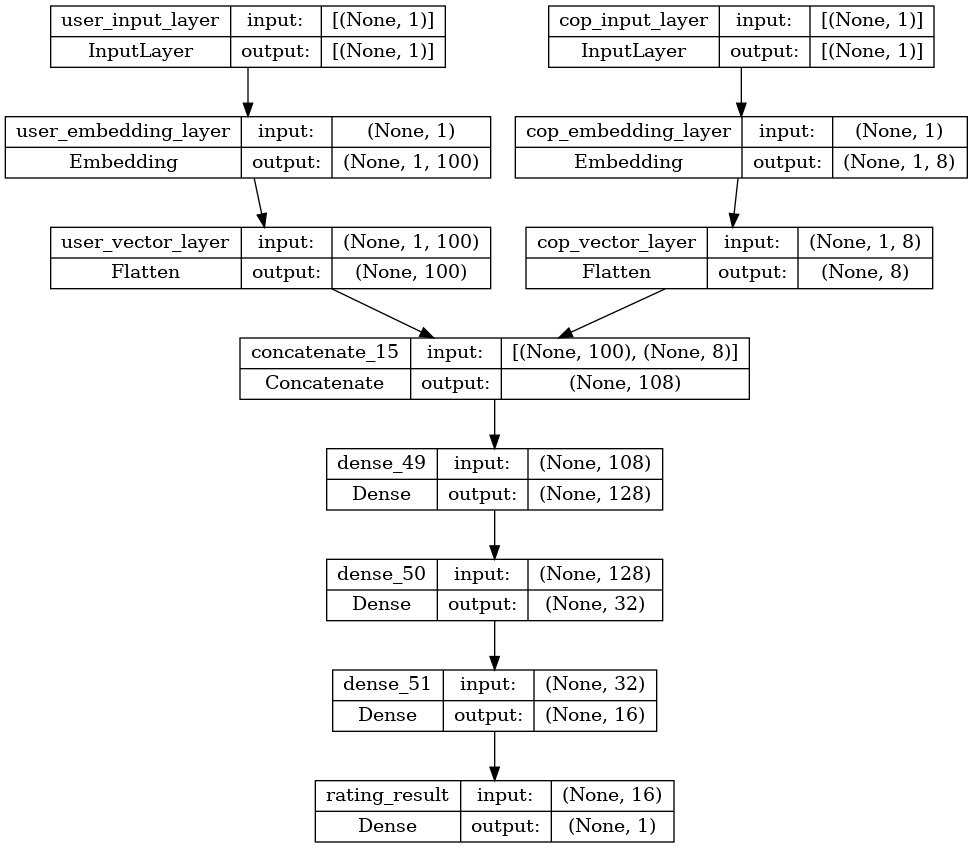

In [136]:
plot_model(model, show_shapes=True)

In [137]:
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau 

model.compile(loss = 'mse', optimizer='adam', metrics=[RootMeanSquaredError()])

In [138]:
es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', restore_best_weights=True)
rd = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

In [139]:
istory = model.fit([train['cust'], train['cop_c']], train['ratings'],  epochs=30, batch_size=512, validation_split=0.2, verbose=1, callbacks=[es,rd])

Epoch 1/30
5771/5771 [==============================] - 19s 3ms/step - loss: 13.4508 - root_mean_squared_error: 3.6675 - val_loss: 13.0409 - val_root_mean_squared_error: 3.6112 - lr: 0.0010
Epoch 2/30
5771/5771 [==============================] - 18s 3ms/step - loss: 12.8383 - root_mean_squared_error: 3.5831 - val_loss: 12.8531 - val_root_mean_squared_error: 3.5851 - lr: 0.0010
Epoch 3/30
5771/5771 [==============================] - 18s 3ms/step - loss: 12.6205 - root_mean_squared_error: 3.5525 - val_loss: 12.7525 - val_root_mean_squared_error: 3.5711 - lr: 0.0010
Epoch 4/30
5771/5771 [==============================] - 19s 3ms/step - loss: 12.4860 - root_mean_squared_error: 3.5336 - val_loss: 12.7263 - val_root_mean_squared_error: 3.5674 - lr: 0.0010
Epoch 5/30
5771/5771 [==============================] - 20s 3ms/step - loss: 12.3907 - root_mean_squared_error: 3.5200 - val_loss: 12.6665 - val_root_mean_squared_error: 3.5590 - lr: 0.0010
Epoch 6/30
5771/5771 [============================